In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create the random number using make_regression funtion
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

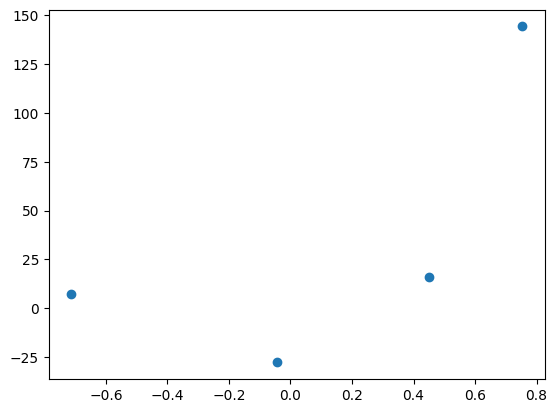

In [3]:
plt.scatter(X,y)

In [4]:
# Lest apply ols
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [5]:
slop = reg.coef_
inter = reg.intercept_
print(f"Slop = {slop}, Intercept = {inter}")

Slop = [78.35063668], Intercept = 26.15963284313262


In [6]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [7]:
X_pred = reg.predict(X)
X_pred


array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

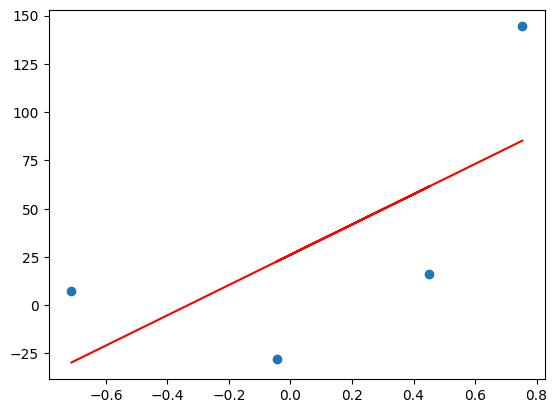

In [8]:
plt.scatter(X,y)
plt.plot(X,X_pred,color='red')

In [9]:
# Let's apply garedient descent assuming slop is constent m = 78.35 
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 126).reshape(4) # mx + c
y_pred

array([ 70.18419163, 161.39949674, 122.51318381, 185.05759577])

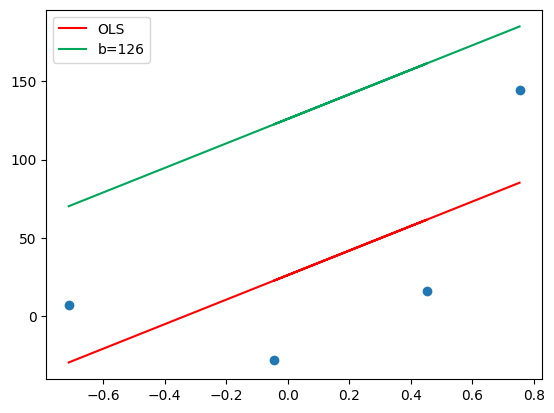

In [10]:
plt.scatter(X,y)
plt.plot(X,X_pred,color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label = 'b=126')
plt.legend()
plt.show()

# Using constant slop to make gradient descent

In [11]:
m = 78.35
b = 126

loss_slop = -2 * np.sum(y- m*X.ravel()-b)
loss_slop

798.722365917908

In [12]:
# Let's take learning  ratemor step size 
lr = 0.1
step_size = loss_slop * lr
step_size

79.8722365917908

In [13]:
# Calculate the new intercept
b = b - step_size
b

46.127763408209205

In [14]:
y_pred1 = ((78.35 * X) + b).reshape(4)
y_pred1

array([ -9.68804496,  81.52726015,  42.64094722, 105.18535918])

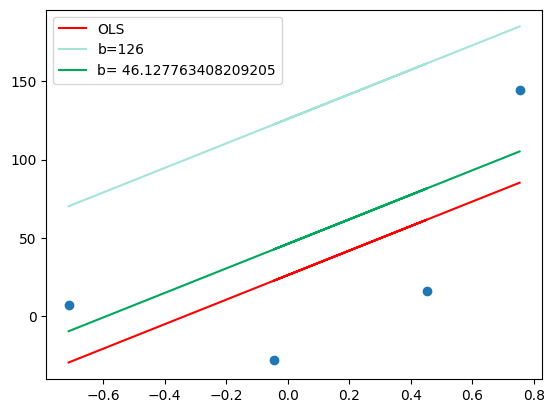

In [15]:
plt.scatter(X,y)
plt.plot(X,X_pred,color='red',label='OLS')
plt.plot(X,y_pred,color='#A3E4D7',label = 'b=126')
plt.plot(X,y_pred1,color='#00a65a',label = 'b= {}'.format(b))
plt.legend()
plt.show()

In [16]:
# Iteration 2
loss_slop = -2 * np.sum(y - m*X.ravel() - b)
print(f"loss_slop = {loss_slop}")

step_size = loss_slop * lr
print(f"step_size = {step_size}")

# new intercept 
b = b - step_size
print(f"New b ={b}")


loss_slop = 159.74447318358148
step_size = 15.974447318358148
New b =30.153316089851057


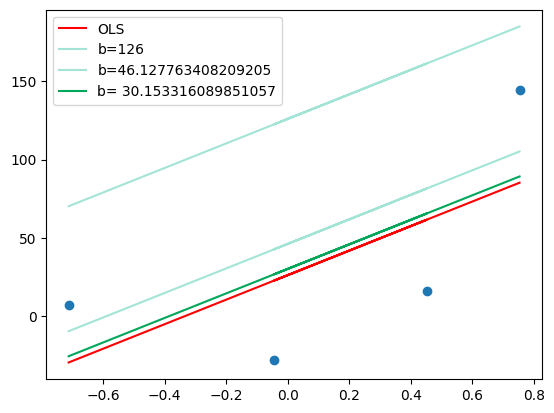

In [17]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,X_pred,color='red',label='OLS')
plt.plot(X,y_pred,color='#A3E4D7',label = 'b=126')
plt.plot(X,y_pred1,color='#A3E4D7',label = 'b=46.127763408209205')
plt.plot(X,y_pred2,color='#00a65a',label = 'b= {}'.format(b))
plt.legend()
plt.show()

In [18]:
# Iteration 3

loss_slop = -2 * np.sum(y - m*X.ravel() - b)
print(f"loss_slop = {loss_slop}")

step_size = loss_slop * lr
print(f"step_size = {step_size}")

# new intercept 
b = b - step_size
print(f"New b ={b}")

loss_slop = 31.94889463671629
step_size = 3.194889463671629
New b =26.958426626179428


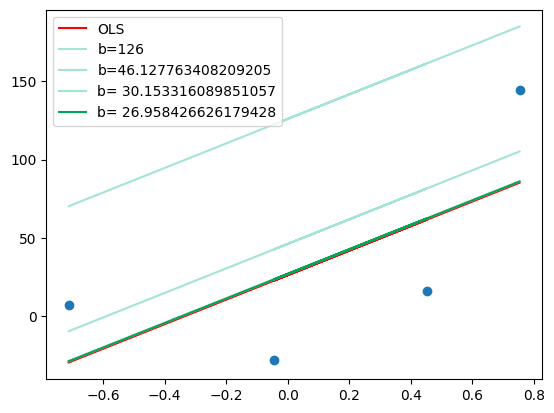

In [19]:
y_pred2 = ((78.35 * X) + b).reshape(4) # mx + c

plt.scatter(X,y)
plt.plot(X,X_pred,color='red',label='OLS')
plt.plot(X,y_pred,color='#A3E4D7',label = 'b=126')
plt.plot(X,y_pred1,color='#A3E4D7',label = 'b=46.127763408209205')
plt.plot(X,y_pred2,color='#A3E4D7',label = 'b= 30.153316089851057')
plt.plot(X,y_pred2,color='#00a65a',label = 'b= {}'.format(b))
plt.legend()
plt.show()

# By using loop

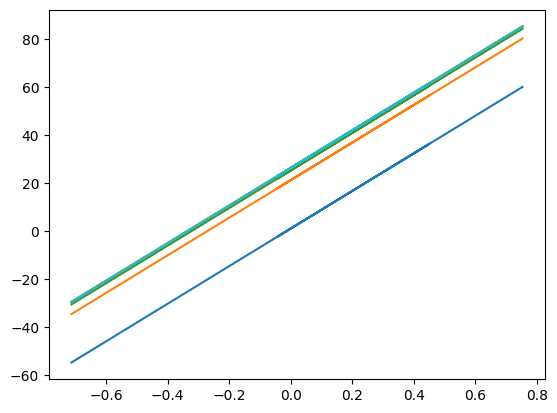

In [20]:
b = -100
m = 78.35
lr = 0.1

epochs = 10
for i in range(epochs):
    loss_slop = -2 * np.sum(y-m*X.ravel() - b)
    b = b - (lr * loss_slop)
    y_pred = m * X + b
    
    plt.plot(X,y_pred)
  
    

# To create class implement the gradient descent

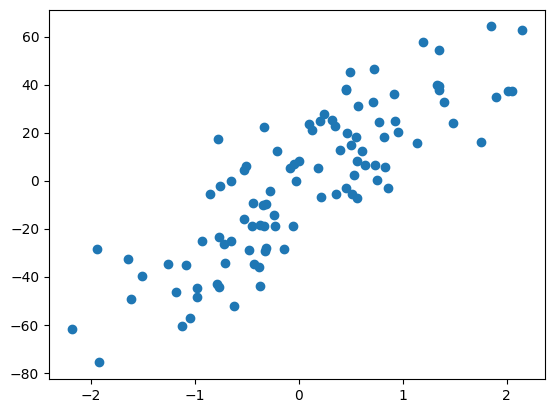

In [21]:
# create the random number using make_regression funtion
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
m= lr.coef_
c= lr.intercept_
print(f'Slop = {m}, Intercept = {c}')

Slop = [27.82809103], Intercept = -2.29474455867698


In [23]:
m = 27.82

class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calculate the  b using GD
        
        for i in range(self.epochs):
            loss_slop = -2 * np.sum(y-self.m*X.ravel() - self.b)
            self.b = self.b -(self.lr * loss_slop)
            print(loss_slop,self.b)
        print(self.b)    
            


In [24]:
gd = GDRegressor(0.001,100)
gd.fit(X,y)

-23525.1419783106 -96.4748580216894
-18820.11358264848 -77.65474443904093
-15056.090866118784 -62.59865357292214
-12044.872692895024 -50.55378088002711
-9635.898154316017 -40.917882725711095
-7708.718523452817 -33.20916420225828
-6166.974818762253 -27.042189383496027
-4933.579855009803 -22.108609528486223
-3946.8638840078415 -18.16174564447838
-3157.4911072062723 -15.004254537272107
-2525.992885765018 -12.47826165150709
-2020.794308612015 -10.457467342895075
-1616.6354468896116 -8.840831896005463
-1293.3083575116898 -7.547523538493774
-1034.6466860093517 -6.512876852484422
-827.7173488074811 -5.685159503676941
-662.1738790459849 -5.022985624630956
-529.739103236788 -4.493246521394168
-423.79128258943047 -4.069455238804737
-339.0330260715442 -3.730422212733193
-271.22642085723544 -3.459195791875958
-216.98113668578833 -3.2422146551901694
-173.5849093486306 -3.068629745841539
-138.8679274789046 -2.929761818362634
-111.09434198312377 -2.8186674763795105
-88.87547358649888 -2.7297920027930